# Question

Construct a sequence K such that
- K(0) = 2
- K(1) = 1
- K(n) = (K(n-1)+K(n-2))^2, n>1

Write a function Kseq(start, stop, step) to implement this

- Kseq(0,6,1) = [2,1,9,100, 11881, 143544361]
- Kseq(2,6,2) = [9, 11881]

# Non Recursive Solution

In [1]:
# f(x) is a function that given a sequence K, calculates the next element of the K sequence
 
def f(x):
    x_last = x[-1]
    x_next2last = x[-2]
    x_next = (x_last + x_next2last)**2
    return x_next

In [2]:
def Kseq_nr(start, stop, step):
    x = [2,1,]   #Starting sequence
    Y = []       #List that holds the whole sequence till n = stop elements
    K = []       #List that holds only the elements that are at range(start, stop, step) positions

    ### Following loop calculates all emelents of the K sequence with start = 0, stop = n, step =1 
    
    for i in range(0, stop, 1):
        if i <= 1:                  #For first 2 elements, simply append the 2 elements from x
            Y.append(x[i])
        else:                       #For elements after that, run function f(x) and append elements to Y
            Y.append(f(Y))
            
    ### Next loop takes into account start, stop and step input into the function as 
    ### parameters and selects only those for the list K. 
    ### So for range(0,6,1) = [0,1,2,3,4,5]
    ### And for range(2,6,2) = [2,4]
    
    for j in range(start, stop, step):
        K.append(Y[j])
    return K

In [3]:
print(Kseq_nr(0,6,1))
print(Kseq_nr(2,6,2))

[2, 1, 9, 100, 11881, 143544361]
[9, 11881]


# Recursive Solution

In [4]:
# This is a recursive function that behaves like a cumulative. It takes in a sequence x, n is 
# the number of elements you want in the sequence and i is a counter to keep track of how many times
# the recursion was called.

def g(x, n, i):
    
    ####### Break condition ########
    if i >= n - 2:        #(n-2) is there since we have 2 elements in x already
        return x
    
    ####### Update Counter ########
    i+=1
    
    ####### Series of transformations #######
    x_last = x[-1]
    x_next2last = x[-2]
    x_next = (x_last + x_next2last)**2
    x.append(x_next)
    
    ###### Recall the function recusively till i counter crosses the condition #######
    g(x, n, i)         #Here you are passing the new x after appending the x_next element
    return x

In [5]:
#This function takes start, stop and step into account by the user and calls g(x) accordingly

def Kseq_r(start, stop, step):
    x = [2,1,]    #Initial sequence
    K=[]          #Empty K sequence which will hold the elements of the output
    i = 0         #Recursion function counter (starts at 0, till break condition is met)
    
    Y = g(x, stop, i)  #Runs the recurvive function till i have stop = n elements in the sequence
    
    ### Next loop takes into account start, stop and step input into the function as 
    ### parameters and selects only those for the list K. 
    ### So for range(0,6,1) = [0,1,2,3,4,5]
    ### And for range(2,6,2) = [2,4]
    
    for j in range(start, stop, step):
        K.append(Y[j])
    
    return K

In [6]:
print(Kseq_r(0,6,1))
print(Kseq_r(2,6,2))

[2, 1, 9, 100, 11881, 143544361]
[9, 11881]


# Another recursive solution (looks more elegent, but not optimal)

This method is NOT efficient since for each element you recursively calculate elements till you get that element. That means you are redundently calculating the first 5 elements to get 6th .. and then again calculating the first 4 elements to get the 5th element in the list.

In [7]:
#This function calculates the n_th element independently and recursively

def k_element(n):
    if n == 0:
        x = 2
    elif n == 1:
        x = 1
    else:
        x = (k_element(n-1)+ k_element(n-2))**2
    return x

In [8]:
#This function calculates the list of elements you want in the k_sequence 
#and then it calls the k_element function independently for each element

def kseq(start, stop, step):
    k_seq = []
    for i in range(start, stop, step):
        k_seq.append(k_element(i))
    return k_seq

In [9]:
print(kseq(0,6,1))
print(kseq(2,6,2))

[2, 1, 9, 100, 11881, 143544361]
[9, 11881]


# Analysis of runtimes

In [10]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [11]:
n = 10
results = np.zeros((n, 3))

In [12]:
for i in range(10):
    start = time()
    Kseq_nr(0,i,1)
    end = time()
    results[i,0] = end-start

    start = time()
    Kseq_r(0,i,1)
    end = time()
    results[i,1] = end-start
    
    start = time()
    kseq(0,i,1)
    end = time()
    results[i,2] = end-start

In [22]:
df = pd.DataFrame(results)
df.columns = ['no recursion', 'recursion method 1', 'recursion method 2']

Text(0,0.5,'Run time (in sec)')

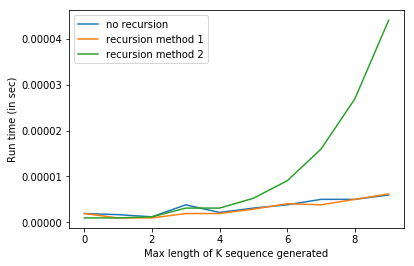

In [23]:
plt.plot(df)
plt.legend(df.columns)
plt.xlabel('Max length of K sequence generated')
plt.ylabel('Run time (in sec)')